# Data Generation

In [1]:
import bilby

import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor

import csv
import os

## Waveform Generation

In [2]:
waveform_duration = 5 # Seconds
sampling_frequency = 2048 # Hz
waveform_approximant = 'IMRPhenomA'
waveform_reference_frequency = 25 # Hz
waveform_minimum_frequency = 10 # Hz
waveform_pn_phase_order = -1 

In [3]:
waveform_generator = bilby.gw.WaveformGenerator(
            duration=waveform_duration, 
            sampling_frequency=sampling_frequency,
            frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole, # specify you're speaking the lal BBH language
            parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters, # useful if you want to convert parameters under the hood
            waveform_arguments={
                "waveform_approximant": waveform_approximant,
                "reference_frequency": waveform_reference_frequency,
                "minimum_frequency": waveform_minimum_frequency,
                "pn_phase_order": waveform_pn_phase_order,
            },
        )

09:57 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [4]:
mass_ratio = 1

mass_1 = 30
mass_2 = mass_1*mass_ratio

In [5]:
injection_parameters = {
    'mass_1_source' : mass_1, #msol, in source frame
    'mass_2_source' : mass_2, #msol, in source frame
    'a_1' : 0,
    'a_2' : 0,
    'phi_jl' : 0,
    'phi_12' : 0,
    'tilt_1' : 0,
    'tilt_2' : 0,
    'luminosity_distance' : 5000, #in Mpc
    'dec' : 0.,
    'ra' : 0.,
    'theta_jn' : 0.,
    'psi' : 0.,
    'phase' : 0.,
    'geocent_time' : 0,
}


In [10]:
waveform_frequencies = waveform_generator.frequency_array
waveform_time_array = waveform_generator.time_array
polarizations = waveform_generator.frequency_domain_strain(injection_parameters)
time_domain_wf = waveform_generator.time_domain_strain(injection_parameters)

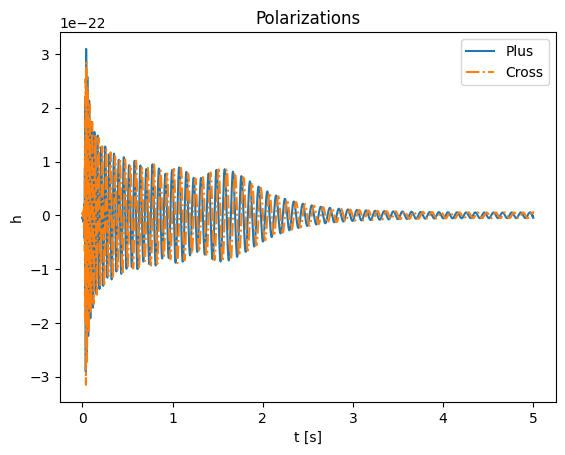

In [12]:
plt.title("Polarizations")
plt.plot(waveform_time_array, time_domain_wf['plus'], label="Plus")
plt.plot(waveform_time_array, time_domain_wf['cross'], linestyle='-.', label="Cross")
plt.xlabel("t [s]")
plt.ylabel("h")
plt.legend()
plt.show()

## Preparing the data

In [13]:
X = waveform_time_array
y = time_domain_wf['plus']

rescaled_y = (y-np.mean(y))/np.std(y)

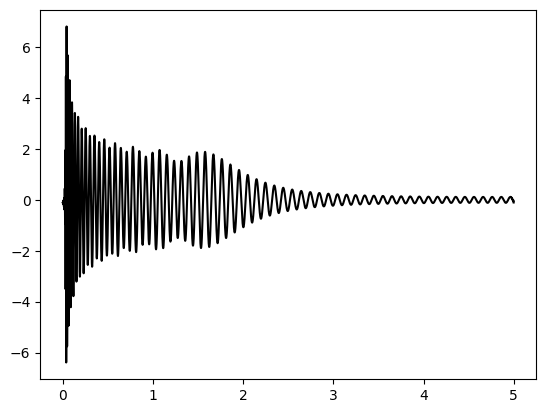

In [14]:
plt.plot(X,rescaled_y,c="black")
plt.show()

In [15]:
Xtrain = X
ytrain = rescaled_y

## Creating a Data File

In [21]:
# Zip the arrays together
rows = zip(Xtrain, ytrain, mass_ratio*np.ones(len(Xtrain)))

# Specify the CSV file path
csv_file_path = 'time_data.csv'

# Function to clean the file before writing
def clean_file(file_path):
    if os.path.exists(file_path):
        os.remove(file_path)

# Write to CSV
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # Write header if needed
    csv_writer.writerow(['t', 'y', 'q'])
    
    # Write data rows
    csv_writer.writerows(rows)

print(f"CSV file '{csv_file_path}' has been generated.")

CSV file 'time_data.csv' has been generated.
